In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100

In [2]:
fig_width = 5.8 * 0.8
fig_height = 8.3/3 * 0.8

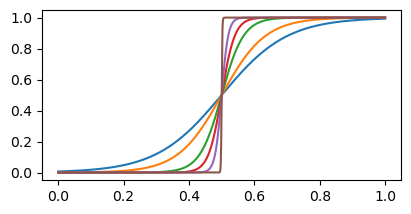

In [3]:
# Figure 3-a

def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

fig, axs = plt.subplots(figsize=(fig_width, fig_height))

LW = 2
LS2 ="-"
LS3 ="-"
LS = 8                              # label size

tick_positions = [0, 0.5, 1]
tick_labels = ['0', '0.5', '1']
tick_size = 8



X = np.linspace(0, 1, 1000)
axs.plot(X, logistic(X, 1, 10, 0.5))
axs.plot(X, logistic(X, 1, 15, 0.5))
axs.plot(X, logistic(X, 1, 30, 0.5))
axs.plot(X, logistic(X, 1, 50, 0.5))
axs.plot(X, logistic(X, 1, 100, 0.5))
axs.plot(X, logistic(X, 1, 1000, 0.5))


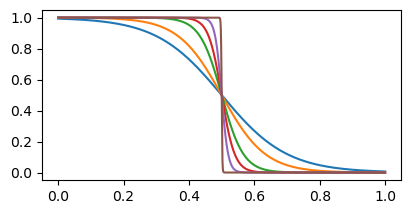

In [4]:
# Figure 3-b

def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

fig, axs = plt.subplots(figsize=(fig_width, fig_height))

LW = 2
LS2 ="-"
LS3 ="-"
LS = 8                              # label size

tick_positions = [0, 0.5, 1]

X = np.linspace(0, 1, 1000)

axs.plot(X, 1-logistic(X, 1, 10, 0.5))
axs.plot(X, 1-logistic(X, 1, 15, 0.5))
axs.plot(X, 1-logistic(X, 1, 30, 0.5))
axs.plot(X, 1-logistic(X, 1, 50, 0.5))
axs.plot(X, 1-logistic(X, 1, 100, 0.5))
axs.plot(X, 1-logistic(X, 1, 1000, 0.5))

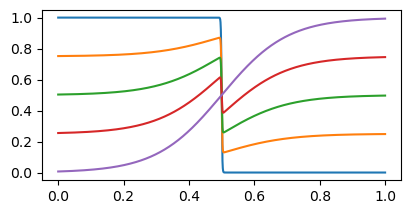

In [5]:
# Figure 3-c

def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

def xia_logistic(x, L, kp, km, x0, p):
    return p*logistic(x, L, kp, x0) + (1-p)*logistic(x, L, -km, x0)

fig, axs = plt.subplots(figsize=(fig_width, fig_height))

LW = 2
LS2 ="-"
LS3 ="-"
LS = 8                              # label size

tick_positions = [0, 0.5, 1]

X = np.linspace(0, 1, 1000)

PP = np.linspace(0, 1, 5)

axs.plot(X, xia_logistic(X, 1, 10, 1000, 0.5, PP[0]))
axs.plot(X, xia_logistic(X, 1, 10, 1000, 0.5, PP[1]))
axs.plot(X, xia_logistic(X, 1, 10, 1000, 0.5, PP[2]))
axs.plot(X, xia_logistic(X, 1, 10, 1000, 0.5, PP[3]))
axs.plot(X, xia_logistic(X, 1, 10, 1000, 0.5, PP[4]))



In [6]:
# Run these before Fig4 d-f
def run_IRF (Oi, epsilon, mu, N, function, support):
    y =[]

    mm=[]
    MM=[]
    eo = np.linspace(support/2,1-support/2,100)
    for EO in eo:
        #random opinion uniformly distributed between m and M, such that (M+m)/2 = EO
        # and as wide as possible under the constrain m>=0 and M<=1    
        m = EO-support/2
        M = EO+support/2

        mm.append(m)
        MM.append(M)

        O = np.random.uniform(m,M,N)
        Updated_O = function(Oi, O, epsilon, mu)

        y.append(np.mean(Updated_O))

    return y, eo

def Assimilative(Oi,OO,epsilon,mu):
    res = np.zeros(len(OO))
    for indx,O in enumerate(OO):
        res[indx] = Oi + mu*(O-Oi)
    return res


def Negative_Influence(Oi,OO,epsilon,mu):
    res = np.zeros(len(OO))
    for indx,O in enumerate(OO):
        if(np.abs(Oi-O)<=epsilon):
            res[indx] = Oi + mu*(O-Oi)
        else:
            res[indx] = Oi - mu*(O-Oi) # multiply by the space I still can move
        #res[indx] = Oi  # multiply by the space I still can move

    res[np.where(res<0)] = 0
    res[np.where(res>1)] = 1
    return res

def Reinforcement(Oi,OO,epsilon,mu):
    res = np.zeros(len(OO))

    O1 = Oi * 2 - 1
    O2 = OO * 2 - 1

    for indx,O in enumerate(O2):
        if(np.sign(O1)==np.sign(O)):
            res[indx] = O1 + 2*mu * np.sign(O1)
        else:
            res[indx] = O1 + mu * (O-O1)
    res = (res+1)/2
    res[np.where(res<0)] = 0
    res[np.where(res>1)] = 1
    return res

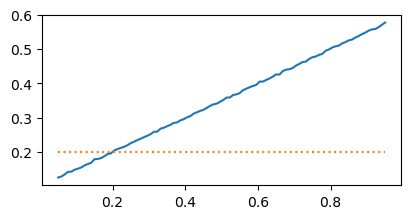

In [7]:
# Fig 4-d
fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

epsilon = 0.25
mu = 0.5

y2_ASS, eo = run_IRF (0.2, epsilon, mu, N, Assimilative, .1)

A = np.array([0.05,0.95])
B = np.array([1,1])

ax1.plot(eo, y2_ASS)
ax1.plot(A,0.2*B, ':')

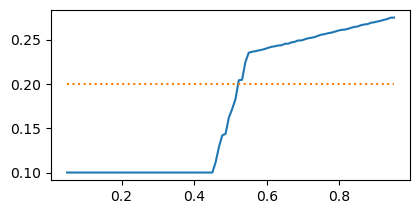

In [8]:
# Fig 4-eùepsilon = 0.05

fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

mu = 0.1
o1_R, o2_R, o3_R = 0.3, 0.5, 0.7

y2_R, eo = run_IRF (0.2, epsilon, mu, N, Reinforcement,.1)

A = np.array([0.05,0.95])
B = np.array([1,1])

ax1.plot(eo, y2_R)
ax1.plot(A, 0.2*B, ':')

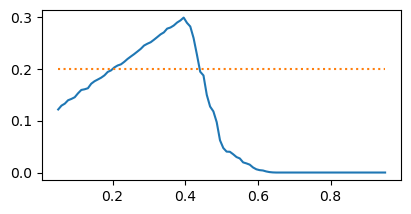

In [9]:
# Fig 4-f
fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

epsilon = 0.25
mu = 0.5
o1_NI, o2_NI, o3_NI = 0.1, 0.3, 0.5
y2_NI, eo = run_IRF (0.2, epsilon, mu, N, Negative_Influence,.1)

A = np.array([0.05,0.95])
B = np.array([1,1])
ax1.plot(eo, y2_NI)
ax1.plot(A,0.2*B, ':')

In [10]:
# Run before Fig 4 g-h
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps



fig_width = 5.8/2
fig_height = 8.3/3 * 0.8

colors = [(1, 0, 0), (0, 0, 0), (0, 0, 1)]  # Red to Black to Blue
cmap_name = 'red_black_blue'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

def single_Assimilative(Oi,OO,mu, N_run, interval):
    res = np.zeros(N_run)
    O = np.random.uniform(OO-interval/2,OO+interval/2,N_run)

    for indx,o in enumerate(O):
        res[indx] = Oi + mu*(o-Oi)
    return np.mean(res), np.median(res), res

def single_Negative_Influence(Oi,OO,epsilon, mu, N_run, interval):
    res = np.zeros(N_run)
    O = np.random.uniform(OO-interval/2,OO+interval/2,N_run)

    for indx,o in enumerate(O):
        if(np.abs(Oi-o)<=epsilon):
            res[indx] = Oi + mu*(o-Oi)
        else:
            res[indx] = Oi - mu*(o-Oi)
        #res[indx] = Oi + mu*(o-Oi)
    res[np.where(res<0)] = 0
    res[np.where(res>1)] = 1
    return np.mean(res), np.median(res), res


def single_Reinforcement(Oi,OO,mu, epsilon, N_run, interval):
    res = np.zeros(N_run)
    O = np.random.uniform(OO-interval/2,OO+interval/2,N_run)

    for indx,o in enumerate(O):
        if((Oi>0.5 and o>0.5) or (Oi<0.5 and o<0.5)):          # they have the same sign
            #print("Oi = ", Oi, "o = ", o, "same sign")
            if(Oi>0.5):
                res[indx] = Oi + mu
            else:
                res[indx] = Oi - mu
        else:
            #print("different signs")
            res[indx] = Oi + epsilon*(o-Oi)

    res[np.where(res<0)] = 0
    res[np.where(res>1)] = 1
    return np.mean(res), np.median(res), res, O 

(0.0, 1.0)

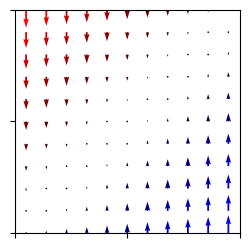

In [12]:
# Fig 4-g
mu = 0.5




interval_j = 0.1

a = - interval_j/(2 * interval_j -2)
b = 1 - interval_j

N_arrow = 11
Oi = np.tile(np.arange(N_arrow),(N_arrow,1))/(N_arrow-1)
Oj = np.tile(np.arange(N_arrow),(N_arrow,1))/(N_arrow-1)
Oj = Oj.T
Oj = (Oj + a)*b
#print(Oi)
#print(Oj)
# linearize the matrix
Oi = Oi.flatten()
Oj = Oj.flatten()

YASS_mean = np.zeros(len(Oi))
YASS_median = YASS_mean.copy()
for i in range(len(Oi)):
    YASS_mean[i], YASS_median[i], ALL = single_Assimilative (Oi[i], Oj[i], mu, N ,interval_j)




xa = Oi
ya = Oj
ua = YASS_median-Oi
va = YASS_mean*0
norm = plt.Normalize(ua.min(), ua.max())

m = max(-ua.min(), ua.max())
norm = plt.Normalize(-m, m)

colorsa = custom_cmap(norm(ua))
fig, axs = plt.subplots(figsize=(fig_width, fig_width))
SC = 6
axs.quiver(ya, xa, va, ua, color=colorsa, scale=SC, width=0.008)
axs.set_xticks([0,0.5,1])
axs.set_xticklabels([])
axs.set_yticks([0,0.5,1])
axs.set_yticklabels([])
axs.set_xlim([0,1])
axs.set_ylim([0,1])

(0.0, 1.0)

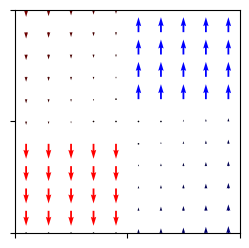

In [13]:
ois = np.array([0,  0.2, 0.4,  0.6,  0.8,  1])
ois = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ojs = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]) +0.05
ojs = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]) +0.05


epsilon = 0.05
mu = 0.1
N_run = 10000



interval_j = 0.1


Oi = np.tile(ois,(len(ojs),1))
Oj = np.tile(ojs,(len(ois),1))


Oj = Oj.T
Oi = Oi.flatten()
Oj = Oj.flatten()

YNIF_mean = np.zeros(len(Oi))
YNIF_median = YNIF_mean.copy()
for i in range(len(Oi)):
    ii = np.round(Oi[i],3)
    jj = np.round(Oj[i],3)
    YNIF_mean[i], YNIF_median[i], ALL, O = single_Reinforcement (ii, jj, mu, epsilon, N ,interval_j)
    #print(ii, jj, np.mean(O))
xr = Oi
yr = Oj
ur = YNIF_median-Oi
vr = YNIF_mean*0
norm = plt.Normalize(ur.min(), ur.max())
colorsr = custom_cmap(norm(ur))

m = max(-ur.min(), ur.max())
norm = plt.Normalize(-m, m)

SC = 3
fig, axs = plt.subplots(figsize=(fig_width, fig_width))
SC = 1.5
axs.quiver(yr, xr, vr, ur, color=colorsr, scale=SC, width=0.008)
axs.set_xticks([0,0.5,1])
axs.set_xticklabels([])
axs.set_yticks([0,0.5,1])
axs.set_yticklabels([])
axs.set_xlim([0,1])
axs.set_ylim([0,1])

(0.0, 1.0)

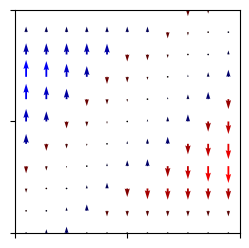

In [14]:
# Fig 4-i
epsilon = 0.3
mu = 0.5



interval_j = 0.1

a = - interval_j/(2 * interval_j -2)
b = 1 - interval_j

Oi = np.tile(np.arange(N_arrow),(N_arrow,1))/(N_arrow-1)
Oj = np.tile(np.arange(N_arrow),(N_arrow,1))/(N_arrow-1)
Oj = Oj.T
Oj = (Oj + a)*b
#print(Oi)
#print(Oj)
# linearize the matrix
Oi = Oi.flatten()
Oj = Oj.flatten()

YNIF_mean = np.zeros(len(Oi))
YNIF_median = YNIF_mean.copy()
for i in range(len(Oi)):
    YNIF_mean[i], YNIF_median[i], ALL = single_Negative_Influence (Oi[i], Oj[i], epsilon, mu, N ,interval_j)


xn = Oi
yn = Oj
un = YNIF_median-Oi
vn = YNIF_mean*0

m = max(-un.min(), un.max())
norm = plt.Normalize(-m, m)
colorsn = custom_cmap(norm(un))
fig, axs = plt.subplots(figsize=(fig_width, fig_width))
SC = 4
axs.quiver(yn, xn, vn, un, color=colorsn, scale=SC, width=0.008)
axs.set_xticks([0,0.5,1])
axs.set_xticklabels([])
axs.set_yticks([0,0.5,1])
axs.set_yticklabels([])
axs.set_xlim([0,1])
axs.set_ylim([0,1])

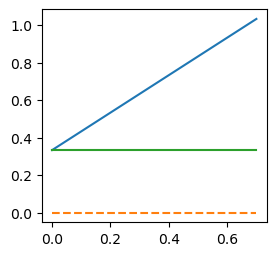

In [15]:
# Fig 5-a
# BAUCH 2005 -- function of infected
fig, ax1 = plt.subplots(figsize=(5.8/2, 8.3/3))

# Parameters for calculations
f_V = 1/3  # Fraction of vaccination in the previous round
f_I = np.linspace(0, 1 - 0.3, 100)  # Fraction of infection in the previous round
f_S = 1 - f_I - f_V  # Probability of susceptibility

# Probabilities of interaction with better outcomes
P_V_if_V = f_V+f_I  # Probability if vaccinated
P_V_if_S = 0*np.ones(len(f_I))
P_V_if_R = f_V*np.ones(len(f_I))  # Probability if recovered


# Plotting
ax1.plot(f_I, P_V_if_V)
ax1.plot(f_I, P_V_if_S,'--')
ax1.plot(f_I, P_V_if_R)

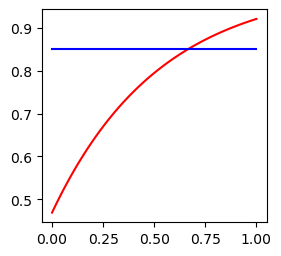

In [16]:
# Fig 5-b
# UAU-SIS model: 
# https://journals.aps.org/pre/pdf/10.1103/PhysRevE.90.012808

zeta = 0.025    # probability of being convinced by an aware neighbor
theta = 0.15    # probability of transmission from aware to aware
N_agents= 100          # number of nodes in the network

NI_A = np.linspace(0, N_agents, N_agents+1)     # number of AWARE -I- neighbors
N_S = N_agents-NI_A                        # number of -S- neighbors
NS_U = N_S*3/4                      # number of UN-AWARE -S- neighbors
NS_A = N_S-NS_U                     # number of AWARE -S- neighbors

P_U_to_A = 1 - (1-zeta)**(NI_A+NS_A)        # probability of becoming aware if unaware
P_A_to_A = (1-theta*np.ones(len(NI_A)))     # probability of staying aware if aware

#global_average  = P_U_to_A * NS_U/(NS_U+NS_A) + P_A_to_A * NS_A/(NS_U+NS_A)     # global average probability of becoming aware

fig, ax1 = plt.subplots(figsize=(5.8/2, 8.3/3))
ax1.plot(NI_A/N_agents, P_U_to_A, '-r', label = "unaware")
ax1.plot(NI_A/N_agents, P_A_to_A, '-b', label = "aware")

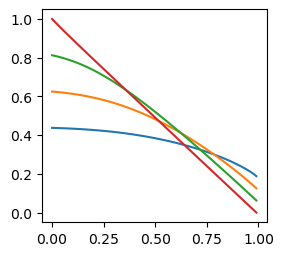

In [17]:
# Fig 5-c
# Alvarez-Zuzek https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0186492
def P_inf(beta, N_I):
    return 1 - np.power(1-beta,N_I)


def AZM_INF(fv, N, omega, beta, O_VI = 0, O_VS = 1, O_UI = 0.25, O_US = 0.25):
    N_V = np.round(fv*N)                    # number of vaccinated is fixed
    N_U = N - N_V                           # number of not vaccinated is fixed

    #print("there are ", N_V, "Vaccinated agents")

    N_I =np.linspace(0, N-1, int(N))
    N_S = N - N_I
    

    N_US = np.zeros(len(N_I))
    N_VS = np.zeros(len(N_I))
    N_UI = np.zeros(len(N_I))
    N_VI = np.zeros(len(N_I))

    # for each number of vaccinated agents:

    n_ui = 1
    n_us = N_U-1
    n_vi = 0
    n_vs = N_V
    
    #print("n_ui = ", n_ui, "n_us = ", n_us, "n_vi = ", n_vi, "n_vs = ", n_vs)
    #print("NI = ", N_I)


    for i, ni in enumerate(N_I):
        if(i>0):
            #print(i)
            #print("infecting the ", i, "th agent")
            # probability of infecting a susceptible agent:
            pinfS = P_inf(beta, i)
            # probability of infecting a vaccinated agent:
            pinfV = P_inf(omega*beta, i)
            #print("pinfS and pinfV = ", pinfS, pinfV)

            # probability of infecting a susceptible agent:
            pS = n_us*pinfS/(n_us*pinfS+n_vs*pinfV)
            # probability of infecting a vaccinated agent:
            pV = n_vs*pinfV/(n_us*pinfS+n_vs*pinfV)

            # update the number of infected agents:
            n_us -= pS
            n_vs -= pV
            n_ui += pS
            n_vi += pV
        #print("n_ui = ", n_ui, "n_us = ", n_us, "n_vi = ", n_vi, "n_vs = ", n_vs)
        N_US[i] = n_us
        N_VS[i] = n_vs
        N_UI[i] = n_ui
        N_VI[i] = n_vi
        
            #print("n_us, n_vs, n_ui, n_vi = ", n_us, n_vs, n_ui, n_vi)
            # calculate the average opinion:
    opinion = O_VI*N_VI + O_VS*N_VS + O_UI*N_UI + O_US*N_US
    opinion = opinion/N

    #print("opinion=", opinion)
    return N_I,N_V, N_US, N_VS, N_UI, N_VI, opinion

fig, axs = plt.subplots(1,1 , sharex=True, figsize=(5.8/2, 8.3/3))
N_agents = 100
beta = 0.1
omega = 0.1

fv = 1/4
N_I,N_V, N_US, N_VS, N_UI, N_VI, opinion = AZM_INF(fv, N_agents, omega, beta)
axs.plot(N_I/N,opinion)

fv = 2/4
N_I,N_V, N_US, N_VS, N_UI, N_VI, opinion = AZM_INF(fv, N_agents, omega, beta)
axs.plot(N_I/N,opinion)

fv = 3/4
N_I,N_V, N_US, N_VS, N_UI, N_VI, opinion = AZM_INF(fv, N_agents, omega, beta)
axs.plot(N_I/N,opinion)

fv = 1
N_I,N_V, N_US, N_VS, N_UI, N_VI, opinion = AZM_INF(fv, N_agents, omega, beta)
axs.plot(N_I/N,opinion)

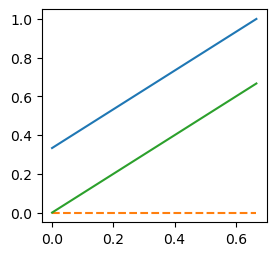

In [18]:
# Fig 5-d
# BAUCH 2005 -- function of vaccinated§
fig, ax1 = plt.subplots(figsize=(5.8/2, 8.3/3))

# Parameters for calculations
f_I = 1/3  # Fraction of vaccination in the previous round
f_V = np.linspace(0, 1 - 1/3, 100)  # Fraction of infection in the previous round
f_S = 1 - f_I - f_V  # Probability of susceptibility

# Probabilities of interaction with better outcomes
P_V_if_V = f_V+f_I  # Probability if vaccinated
P_V_if_S = 0*np.ones(len(f_V))
P_V_if_R = f_V*np.ones(len(f_V))  # Probability if recovered


# Plotting
ax1.plot(f_V, P_V_if_V)
ax1.plot(f_V, P_V_if_S,'--')
ax1.plot(f_V, P_V_if_R)

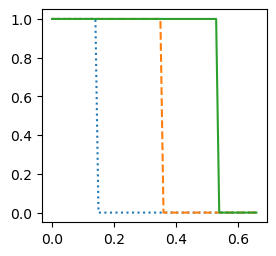

In [19]:
# Fig 5-e
# https://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1002469&type=printable

C_VI = 0.4 # = C_V/C_I

f_I = 1/3 # Fraction of infected neighbors
beta = 0.1
N_agents = 100


def NDEFFO_correct (N, f_I, C_VI, beta):
    N_max_V = int(N-N*f_I)
    N_V = np.linspace(0, N_max_V, np.round(N_max_V+1))
    N_NV = N - N_V

    N_I = np.round(N_NV * f_I)
    
    cost = np.power(1-beta,N_I)-C_VI
    #print(cost)
    B = np.zeros(len(N_V))
    B[np.where(cost<0)[0]] = 1
    return N_V, B



f_I = 1/3
beta = 0.1

fig, ax1 = plt.subplots(figsize=(5.8/2, 8.3/3))


C_VI = 0.05
N_V, B = NDEFFO_correct (N_agents, f_I, C_VI, beta)
ax1.plot(N_V/N_agents,B,':', label = "C_V = 0.4")



C_VI = 0.1
N_V, B = NDEFFO_correct (N_agents, f_I, C_VI, beta)
ax1.plot(N_V/N_agents,B, '--',label = "C_V = 0.6")

C_VI = 0.2
N_V, B = NDEFFO_correct (N_agents, f_I, C_VI, beta)
ax1.plot(N_V/N_agents,B,'-',label = "C_V = 0.8")

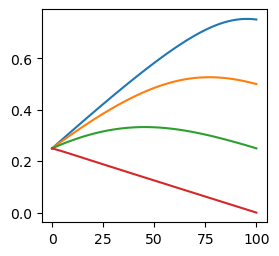

In [20]:
# Fig 5-f
# Alvarez-Zuzek https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0186492
def P_inf(beta, N_I):
    return 1 - np.power(1-beta,N_I)


def AZM_VAC(fi, N, omega, beta, O_VI = 0, O_VS = 1, O_UI = 0.25, O_US = 0.25):
    N_I = np.round(fi*N)                    # number of vaccinated is fixed
    N_S = N - N_I                           # number of not vaccinated is fixed
    N_V =np.linspace(0, N, int(N)+1)
    N_U = N - N_V
    

    N_US = np.zeros(len(N_V))
    N_VS = np.zeros(len(N_V))
    N_UI = np.zeros(len(N_V))
    N_VI = np.zeros(len(N_V))

    # for each number of vaccinated agents:
    for v, nv in enumerate(N_V):
        #print("v = ", v)
        #print("v = ", v)
        # I will infect N_I agents. The question is: HOW?
        # the first infected will always be a unvaccinated agent:
        n_ui = 1
        n_us = N_U[v]-1
        n_vi = 0
        n_vs = N_V[v]

        for i in range(2,int(N_I+1)):
            #print("infecting the ", i, "th agent")
            # probability of infecting a susceptible agent:
            pinfS = P_inf(beta, i)
            # probability of infecting a vaccinated agent:
            pinfV = P_inf(omega*beta, i)
            #print("pinfS and pinfV = ", pinfS, pinfV)

            # probability of infecting a susceptible agent:
            pS = n_us*pinfS/(n_us*pinfS+n_vs*pinfV)
            # probability of infecting a vaccinated agent:
            pV = n_vs*pinfV/(n_us*pinfS+n_vs*pinfV)

            # update the number of infected agents:
            n_us -= pS
            n_vs -= pV
            n_ui += pS
            n_vi += pV
        N_US[v] = n_us
        N_VS[v] = n_vs
        N_UI[v] = n_ui
        N_VI[v] = n_vi
            #print("n_us, n_vs, n_ui, n_vi = ", n_us, n_vs, n_ui, n_vi)
    # calculate the average opinion:
    opinion = O_VI*N_VI + O_VS*N_VS + O_UI*N_UI + O_US*N_US
    opinion = opinion/N

    #print("opinion=", opinion)
    return N_I,N_V, N_US, N_VS, N_UI, N_VI, opinion




fig, axs = plt.subplots(1,1 , sharex=True, figsize=(5.8/2, 8.3/3))
N_agents = 100

fi = 1/4
beta = 0.1
omega = 0.1
N_I,N_V, N_US, N_VS, N_UI, N_VI, opinion = AZM_VAC(fi, N_agents, omega, beta)
axs.plot(N_V,opinion)


fi = 2/4
beta = 0.1
omega = 0.1
N_I,N_V, N_US, N_VS, N_UI, N_VI, opinion = AZM_VAC(fi, N_agents, omega, beta)
axs.plot(N_V,opinion)

fi = 3/4
beta = 0.1
omega = 0.1
N_I,N_V, N_US, N_VS, N_UI, N_VI, opinion = AZM_VAC(fi, N_agents, omega, beta)
axs.plot(N_V,opinion)

fi = 1
beta = 0.1
omega = 0.1
N_I,N_V, N_US, N_VS, N_UI, N_VI, opinion = AZM_VAC(fi, N_agents, omega, beta)
axs.plot(N_V,opinion)


In [22]:
# Fig SI-1

def single_negative_Influence(Oi,O,epsilon,mu):
    res = 0
    if(np.abs(Oi-O)<=epsilon):
        res = Oi + mu*(O-Oi)
    else:
        res = Oi - mu*(O-Oi)
    if(res < 0):
        res = 0
    if(res > 1):
        res = 1
    return res


def double_IRF(O, epsilon, mu, N):
    y0, o0 = run_IRF (O, epsilon, mu, N, Negative_Influence, .1)      # the opinion is averaged over a fixed support of width 0.1 /2
    oo, yy = run_IRF_max(O, epsilon, mu, N, single_negative_Influence )   # the opinion is averaged overa a support of maximum width

    return o0, y0, oo, yy



def run_IRF_max(Oi, epsilon, mu, N, function):
    average_local_opinion = np.linspace(0,1,100)
    FIN_op = np.zeros(len(average_local_opinion))

    for indx, o in enumerate(average_local_opinion):
        # find min/max opinion available:
        if o > 0.5:
            delta = 1-o
        else:
            delta = o
        
        OO = np.random.uniform(o-delta,o+delta,N)

        Updated_O= np.zeros(N)
        for indx2, O in enumerate(OO):
            Updated_O[indx2] = function(Oi, O, epsilon, mu)
        FIN_op[indx] = np.mean(Updated_O)
    return average_local_opinion, FIN_op

o02_1, y02_1, o02_2, y02_2 = double_IRF (0.2, epsilon, mu, N)

o03_1, y03_1, o03_2, y03_2 = double_IRF (0.3, epsilon, mu, N)

o05_1, y05_1, o05_2, y05_2 = double_IRF (0.5, epsilon, mu, N)

fig, axs = plt.subplots(1,3 , sharex=True, figsize=(5.8, 8.3/3))

axs[0].plot(o02_1, y02_1)
axs[0].plot(o02_2, y02_2)
axs[0].plot([0,1],[0.2,0.2],':')
axs[0].set_xlim([0,1])
axs[0].set_ylim([0,1])
axs[0].set_xlabel("average opinion ")
axs[0].set_ylabel("updated opinion ")

axs[1].plot(o03_1, y03_1)
axs[1].plot(o03_2, y03_2)
axs[1].plot([0,1],[0.3,0.3],':')
axs[1].set_xlim([0,1])
axs[1].set_ylim([0,1])
axs[1].set_xlabel("average opinion ")

axs[2].plot(o05_1, y05_1)
axs[2].plot(o05_2, y05_2)
axs[2].plot([0,1],[0.5,0.5],':')
axs[2].set_xlim([0,1])
axs[2].set_ylim([0,1])
axs[2].set_xlabel("average opinion ")
fig.tight_layout()